# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#mean is the sum of the observations divided by the number of observations
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sales_sum = sales[0]
for i in range(1, len(sales)):
    sales_sum += sales[i] 

sales_mean = sales_sum / len(sales)
print(sales_mean)

3052.714285714286


In [10]:
#variance is the sum of the squared differences between an observation and the mean divided by the number of observations
squared_differences = 0
for i in range(len(sales)):
    squared_differences += (sales[i] - sales_mean) ** 2

sales_variance = squared_differences / len(sales)
print(sales_variance)

183761.06122448976


In [11]:
#standard deviation is simply the square root of the variance
sales_standard_deviation = sales_variance ** (1/2)
print(sales_standard_deviation)

428.67360686714756


In [12]:
#function that will return mean, variance. standard deviation of a list of observations
def mean_var_std(observations):
    x_bar = observations[0]
    for i in range(1, len(observations)):
        x_bar += observations[i]

    x_bar = x_bar / len(observations)

    squared_differences = 0
    for i in range(len(observations)):
        squared_differences += (observations[i] - x_bar) ** 2

    observation_variance = squared_differences / len(observations)
    observation_standard_deviation = observation_variance ** (1/2)
    return x_bar, observation_variance, observation_standard_deviation

mean_var_std(sales)

(3052.714285714286, 183761.06122448976, 428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [13]:
number_of_customers = [127, 80, 105, 92, 120, 115, 93]
covariance_sales_customers = np.cov(sales, number_of_customers)
covariance_sales_customers = covariance_sales_customers[0][1]
print(covariance_sales_customers)

7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [14]:
#using our formula from above to find the standard deviation of the number of customers
customer_mean, customer_variance, customer_standard_deviation = mean_var_std(number_of_customers)
customer_standard_deviation


15.792015549069118

In [15]:
#correlation is the covariance of two observations divided by the two observations standard deviations multiplied together
correlation_sales_customers = covariance_sales_customers / (sales_standard_deviation * customer_standard_deviation)
correlation_sales_customers

1.123306307450706

In [16]:
#checking our work using pandas, use ddof=0 because we are dealing with the whole population
sales_df = pd.Series(sales)
customers_df = pd.Series(number_of_customers)
sales_df.cov(customers_df) / (sales_df.std(ddof=0) * customers_df.std(ddof=0))

1.123306307450706

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv',
                      index_col=0)

In [18]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [19]:
#variance-covariance matrix
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [20]:
#correlation_matrix
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

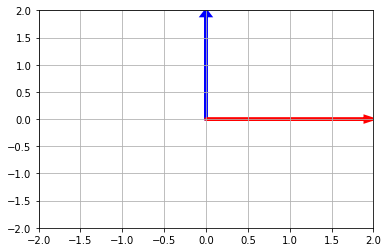

In [21]:
#two vectors are orthoganal if they are parallel
vector_a = np.array([0,2])
vector_b = np.array([2,0])

fix, ax = plt.subplots()
ax.grid()
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.arrow(0,0,
          *vector_a,
          head_width=.1,
          head_length=.1,
          linewidth=3,
          length_includes_head=True,
          color='b')
plt.arrow(0,0,
          *vector_b,
          head_width=.1,
          head_length=.1,
          linewidth=3,
          length_includes_head=True,
          color='r')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [22]:
#two vectors are orthoganal if their dotproduct is 0
#these two vectors are not orthoganal
vector_a = np.array([-5, 3, 7])
vector_b = np.array([6, -8, 2])

np.dot(vector_a, vector_b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [23]:
#all of these quantities are equivalent
vector_c = np.array([2, -15, 6, 20])

norm_c_squared = np.linalg.norm(vector_c) ** 2
norm_c_squared

665.0

In [24]:
c_dot_c = np.dot(vector_c, vector_c)
c_dot_c

665

In [25]:
ct_dot_c = np.dot(vector_c.T, vector_c)
ct_dot_c

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$d = 7\hat{i} + 12\hat{j}$$

$$e = 2\hat{i} + 11\hat{j} - 8\hat{k}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [29]:
#can find the unit vector by dividing the vector by its norm
vector_f = np.array([4, 12, 11, 9, 2])
vector_f_hat = vector_f / np.linalg.norm(vector_f)
vector_f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

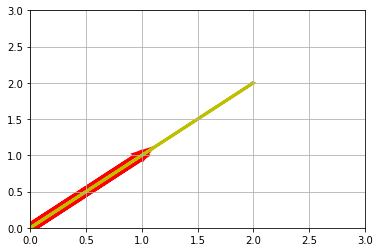

In [44]:
#two vectors are linearly dependent if they lie on the same line
vector_1 = np.array([1,1])
vector_2 = 2 * vector_1

fig, ax = plt.subplots()
ax.grid()
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.arrow(0,0,
          *vector_1,
          color='r',
          linewidth=10)
plt.arrow(0,0,
          *vector_2,
          color='y',
          linewidth=3)
plt.show()

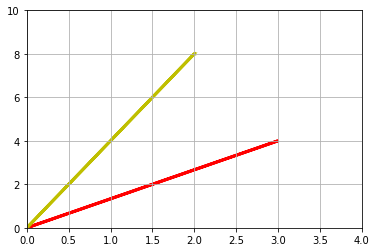

In [47]:
#two vectors are linearly independent if they dont lie on the same line
vector_3 = np.array([3,4])
vector_4 = np.array([2,8])

fig, ax = plt.subplots()
ax.grid()
ax.set_xlim(0,4)
ax.set_ylim(0,10)
plt.arrow(0,0,
          *vector_3,
          color='r',
          linewidth=3)
plt.arrow(0,0,
          *vector_4,
          color='y',
          linewidth=3)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

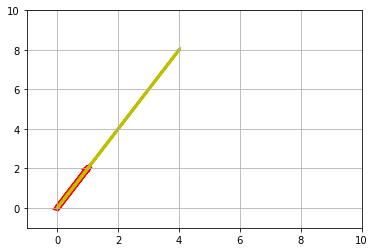

In [53]:
#these two vectors are linearly dependent so can only span a line with slope 2 and intercept of 0
vector_g = np.array([1,2])
vector_h = np.array([4,8])

fig, ax = plt.subplots()
ax.grid()
ax.set_xlim(-1,10)
ax.set_ylim(-1,10)
plt.arrow(0,0,
          *vector_g,
          color='r',
          linewidth=6)
plt.arrow(0,0,
          *vector_h,
          color='y',
          linewidth=3)
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
from mpl_toolkits.mplot3d import Axes3D

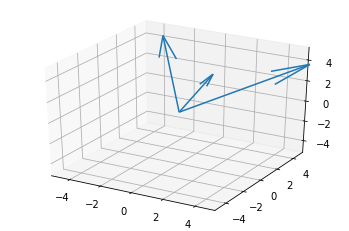

In [58]:
#the span is the entirety of 3d space
vector_l = np.array([1,2,3])
vector_m = np.array([-1,0,7])
vector_n = np.array([4,8,2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,
          *vector_l)
ax.quiver(0,0,0,
          *vector_m)
ax.quiver(0,0,0,
          *vector_n)
ax.set_xlim(-5, 5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



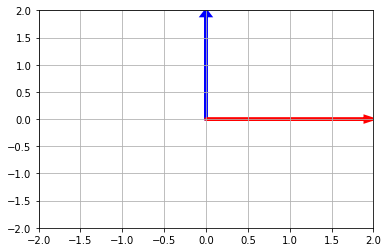

In [59]:
#using the same vectors that used earlier for orthoganl vectors, these form an orthaganol basis
vector_a = np.array([0,2])
vector_b = np.array([2,0])

fix, ax = plt.subplots()
ax.grid()
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.arrow(0,0,
          *vector_a,
          head_width=.1,
          head_length=.1,
          linewidth=3,
          length_includes_head=True,
          color='b')
plt.arrow(0,0,
          *vector_b,
          head_width=.1,
          head_length=.1,
          linewidth=3,
          length_includes_head=True,
          color='r')
plt.show()

## 6.2 What does it mean to form a basis?

to form a basis means to have a set of vectors that are linearly inependent and that span a vector space


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [60]:
matrix_p = np.array([[1,2,3],
                     [-1,0,7],
                     [4,8,2]])

np.linalg.matrix_rank(matrix_p)

3

## 7.2 What does the rank of a matrix tell us?

it tells us the dimension of vector space spanned by its columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

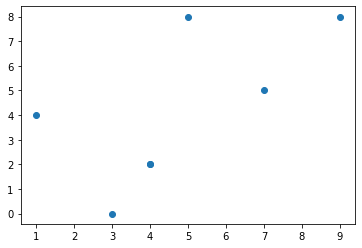

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()